In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels 
#import datetime for dates and time realted calculations
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
register_matplotlib_converters()
from time import time

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#reading the data
# hourly = pd.read_csv('/kaggle/input/pharma-sales-data/saleshourly.csv')
daily = pd.read_csv('salesdaily.csv')
weekly = pd.read_csv('salesweekly.csv')
monthly = pd.read_csv('salesmonthly.csv')

In [3]:
#function to print shape of a given data
def print_shape(data):
    print('Rows : ',data.shape[0])
    print('Columns : ',data.shape[1])

In [4]:
print_shape(daily)
print_shape(weekly)
print_shape(monthly)

Rows :  2106
Columns :  13
Rows :  302
Columns :  9
Rows :  70
Columns :  9


From the shape of monthly dataframe, we see that the data is of 70 months.

# Descriptive Statistics

In [5]:
monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [6]:
weekly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


In [7]:
daily.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [8]:
monthly.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

No Null values in the dataset

In [9]:
daily.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
1777,11/14/2018,5.66,4.67,3.0,28.4,9.0,0.0,0.0,0.0,2018,11,276,Wednesday
1643,7/3/2018,6.34,2.33,1.0,13.6,9.0,0.0,8.0,3.0,2018,7,276,Tuesday
466,4/13/2015,6.67,1.34,7.0,25.2,5.0,0.0,3.0,7.0,2015,4,276,Monday


In [10]:
weekly.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
264,1/27/2019,38.35,53.243,22.5,478.30,69.0,9.0,93.0,9.0
274,4/7/2019,36.19,25.685,26.5,173.35,62.0,1.0,51.0,57.6
48,12/7/2014,28.69,30.281,18.3,175.70,114.0,4.0,40.0,9.4


In [11]:
monthly.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
51,2018-04-30,170.02,107.723,84.60,836.037,289.0,21.0,229.0,197.10
58,2018-11-30,172.29,105.487,102.15,995.150,252.2,22.0,311.0,48.40
49,2018-02-28,128.36,132.804,114.65,1255.374,268.0,12.0,253.0,39.06


Now convert data type of datum column from object to datetime and set date as index of dataset

In [12]:
#converting datatype of dates from object to Datetime
monthly['datum'] = pd.to_datetime(monthly['datum'], format= '%Y-%m-%d')
weekly['datum'] = pd.to_datetime(weekly['datum'], format= '%m/%d/%Y')
daily['datum'] = pd.to_datetime(daily['datum'], format= '%m/%d/%Y')

Analysing Monthly Series Firstly, let us analyse the monthly data and see what inferences can we draw from this data.

# Extracting year, month and day from the datum column

In [13]:
#extracting year from dates
monthly['year'] = monthly['datum'].dt.year
monthly['month'] = monthly['datum'].dt.month
monthly['day'] = monthly['datum'].dt.day

In [14]:
# setting date as index of dataframe, basic condition for anlysing time series data
monthly.set_index(monthly['datum'], inplace= True)

In [15]:
monthly.sample(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2019-05-31,2019-05-31,168.04,97.258,104.10,703.562,265.8,26.0,322.0,135.4,2019,5,31
2017-09-30,2017-09-30,138.33,118.711,88.15,863.750,223.0,23.0,139.0,66.9,2017,9,30


# Visualizations

In [16]:
monthly.tail(4)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2019-07-31,2019-07-31,181.00,103.541,92.80,649.80,250.6,20.0,115.0,105.20,2019,7,31
2019-08-31,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30,2019,8,31
2019-09-30,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10,2019,9,30
2019-10-31,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13,2019,10,31


In [17]:
monthly.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'year', 'month', 'day'],
      dtype='object')

In [18]:
num_col_list=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06']

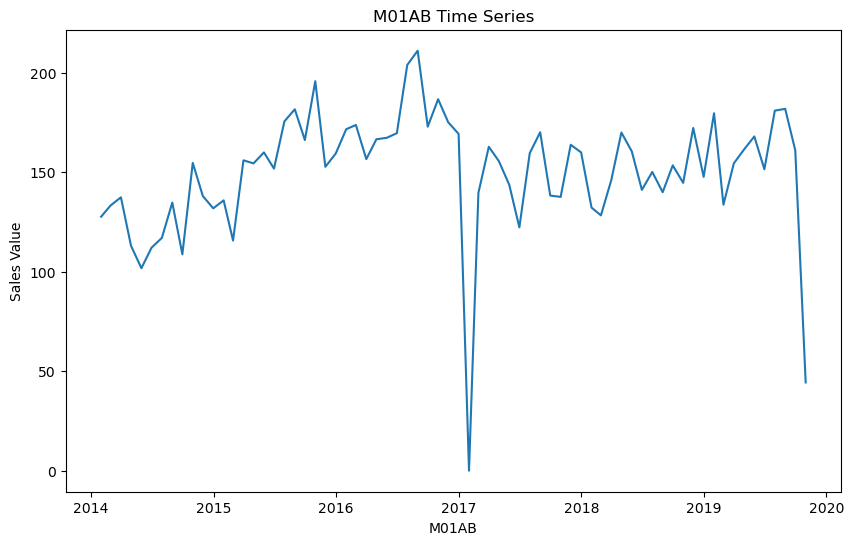

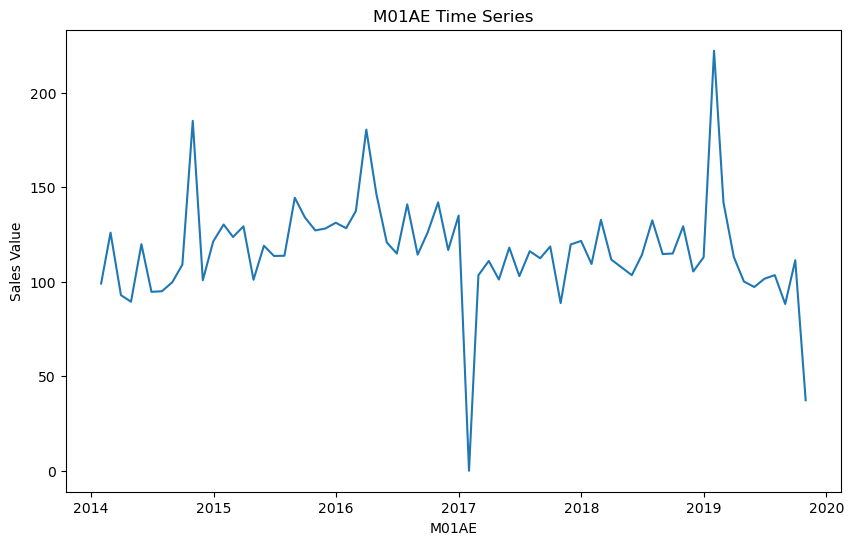

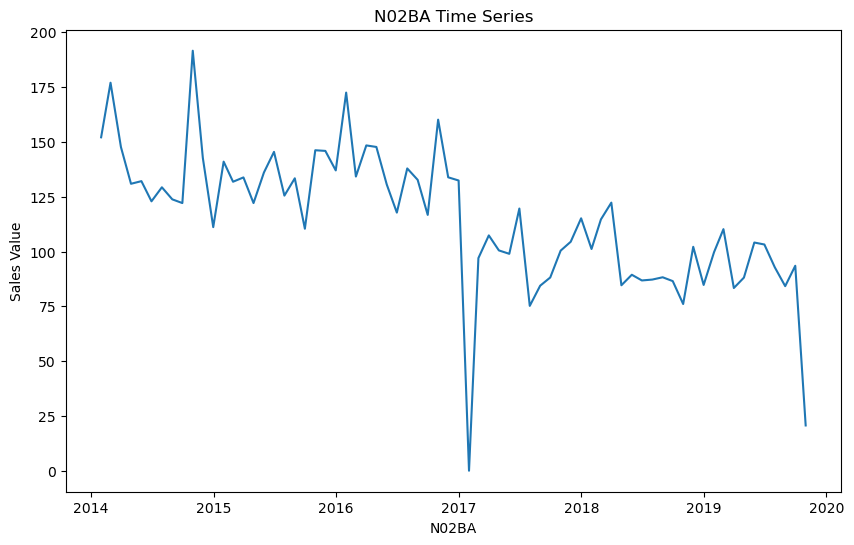

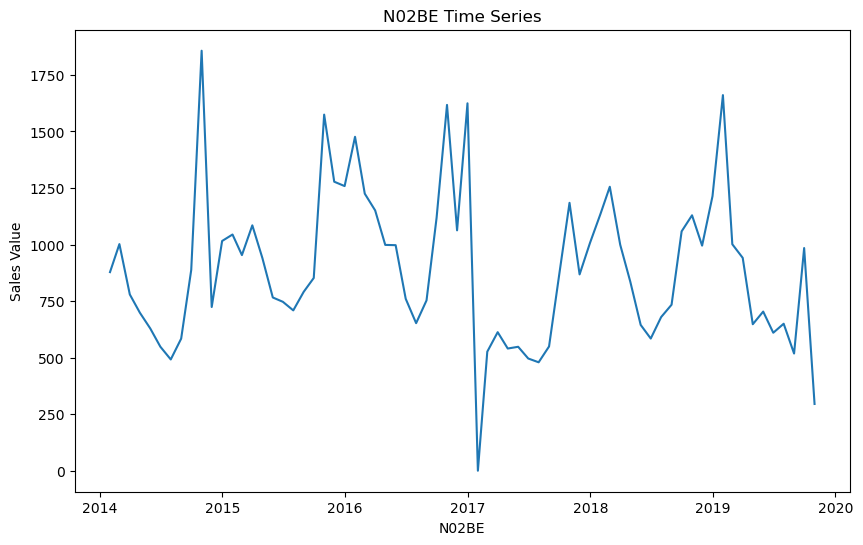

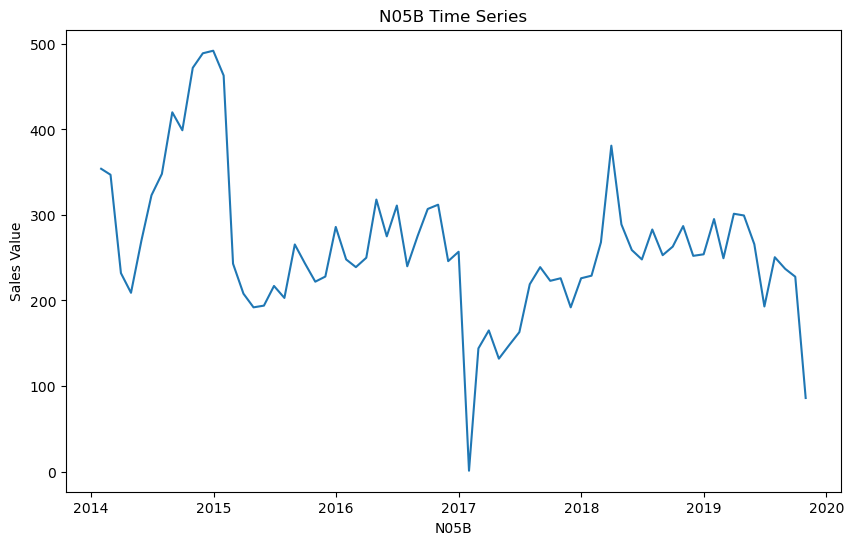

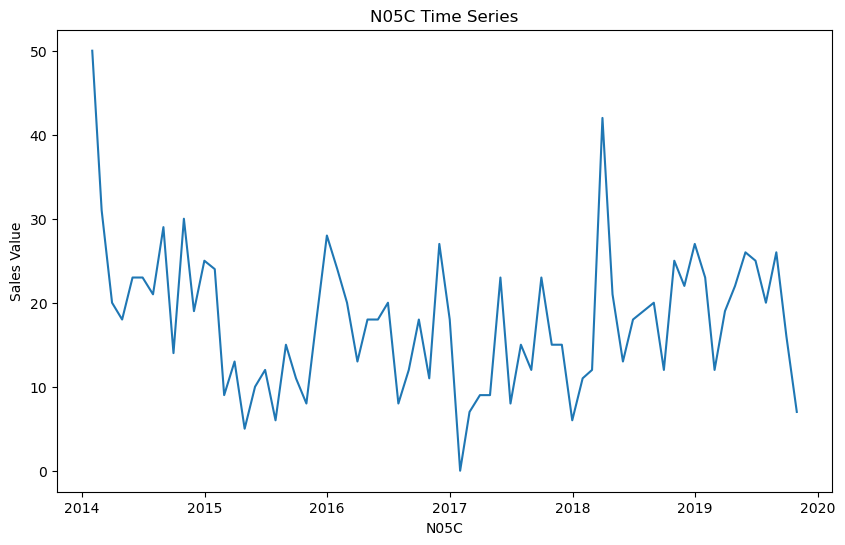

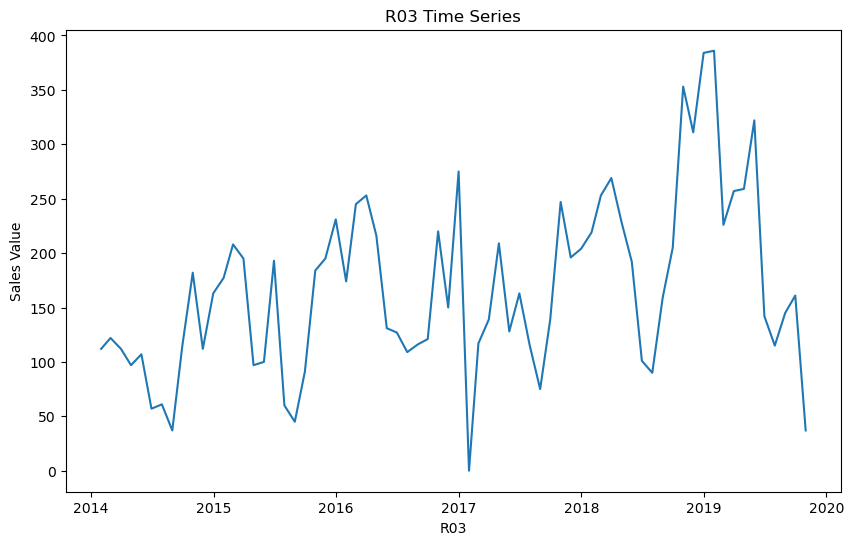

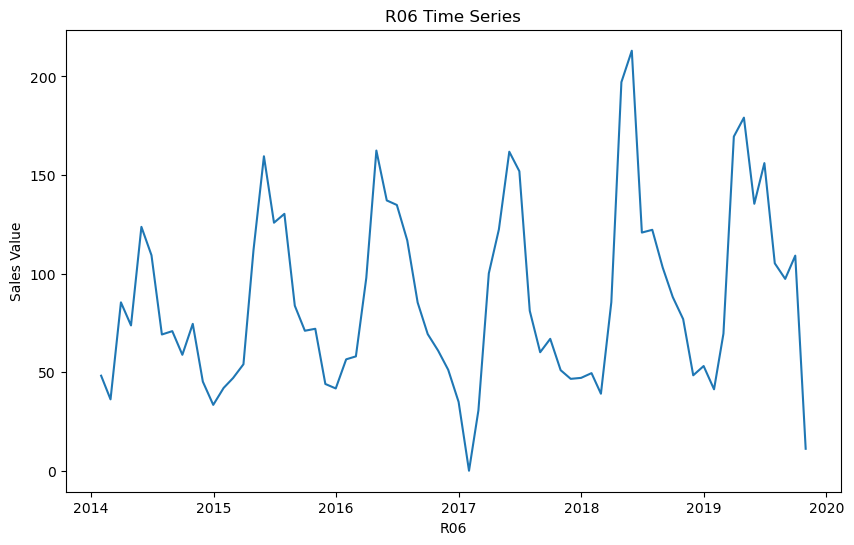

In [19]:
# Plot the time series of each column
for column in num_col_list:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly.index, monthly[column])
    plt.title(f'{column} Time Series')
    plt.xlabel(column)
    plt.ylabel('Sales Value')
    plt.show()


In [20]:
#calculating total sales
monthly['total_sales'] = monthly['M01AB']
for cols in monthly.columns[2:9]:
    monthly['total_sales'] = monthly['total_sales']+monthly[cols]

Forecasting for total sales of drugs , if particular drug forecast is needed. This method could be applied to that as well

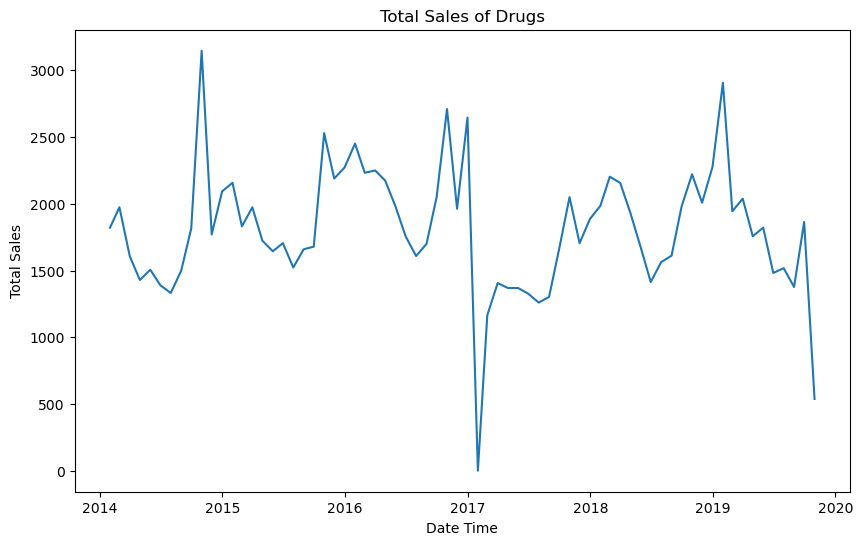

In [21]:
# plotting the total sales data 
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'])
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

Non stationary time series

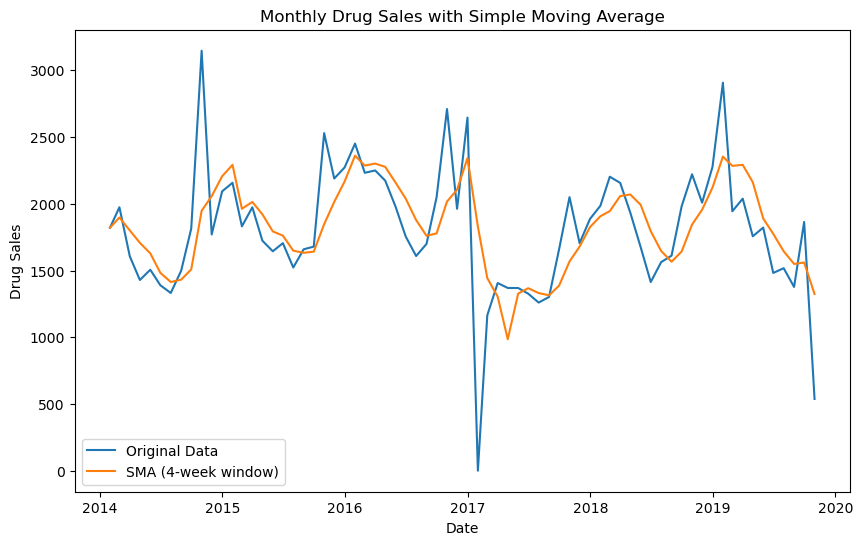

In [22]:
# Calculate a simple moving average with window size 4 (adjust as needed)
window_size = 4
monthly['SMA'] = monthly['total_sales'].rolling(window=window_size, min_periods=1).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'], label='Original Data')
plt.plot(monthly.index, monthly['SMA'], label=f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()

As SMA smoothens out noise from the time series. We can clearly see the orange coloured curve has lower fluctuations. Also the sales of drugs is consistent over the years. Also, the seasonality at the end of each year is very clear as well. The sales at the end of each year increases.

In [23]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [24]:
perform_adf_test(monthly["total_sales"])

ADF Statistic: -3.378637
p-value: 0.011709


In [25]:
perform_adf_test(monthly["SMA"])

ADF Statistic: -1.968782
p-value: 0.300427


Checking for ACF and PACF plots

In [26]:
#infer the frequency of the data
monthly = monthly.asfreq(pd.infer_freq(monthly.index))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


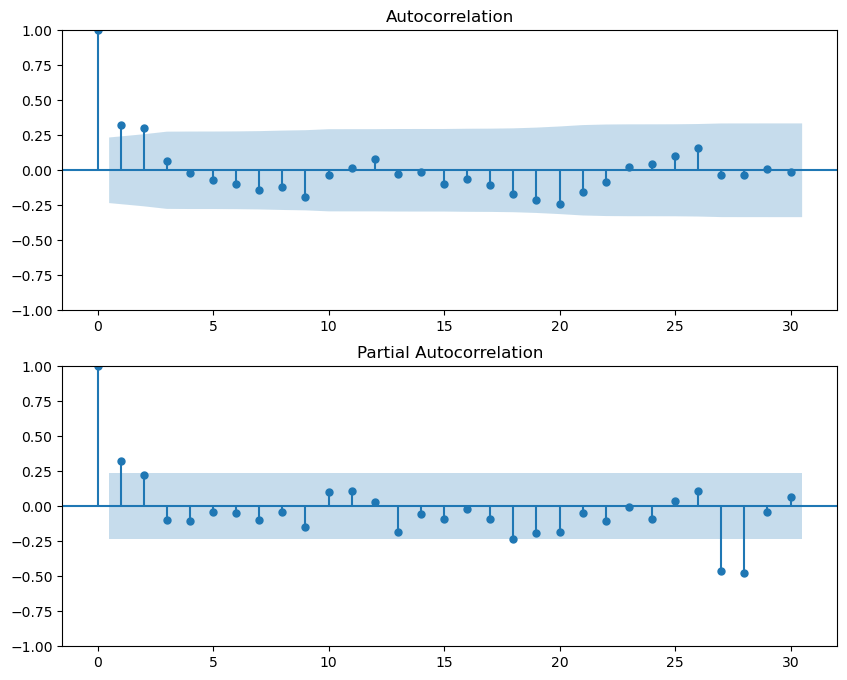

In [27]:
# Plot ACF and PACF of the differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(monthly['total_sales'], lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly['total_sales'], lags=30, ax=ax2)
plt.show()

p and q should be 1,1 respectively as per the PACF and ACF plots analysis respectively.

# ARMA(1,1) model or simply using AR(1) or MA(1) model to fit our time series

# Train test split to check the efficiency of our model

In [28]:
train_end = dt.datetime(2019,7,31)
# test_end = datetime(2004,1,1) till end

train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

We will forecast only three months of data in advance because prediction beyond a certain limit is useless and leads to error

# Not using ARMA model because the p values for coefficients of MA model are more than 0.05, that's why rejecting those values and sticking to AR model

In [29]:
# Fit an ARIMA model to the  total sales series
# p, d, q = 1, 0, 1  # You can adjust these values based on ACF and PACF analysis
# model = sm.tsa.ARIMA(train_data["total_sales"], order=(p, d, q))
# results = model.fit()

In [30]:
# We can adjust these values based on ACF and PACF analysis
model = statsmodels.tsa.ar_model.AutoReg(train_data["total_sales"], lags=1)
results = model.fit()

In [31]:
# Print model summary
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_sales   No. Observations:                   67
Model:                     AutoReg(1)   Log Likelihood                -494.001
Method:               Conditional MLE   S.D. of innovations            430.924
Date:                Thu, 24 Oct 2024   AIC                            994.003
Time:                        13:34:29   BIC                           1000.572
Sample:                    02-28-2014   HQIC                           996.599
                         - 07-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1170.2422    218.386      5.359      0.000     742.213    1598.272
total_sales.L1     0.3607      0.115      3.129      0.002       0.135       0.587
                                    

Means AR model's coefficient is useful but the MA seems to be useless as per its p value

# So our series follow AR(1) model which is:

In [32]:
test_data


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day,total_sales,SMA
datum,,,,,,,,,,,,,,
2019-08-31,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30,2019,8,31,1377.779,1550.07175
2019-09-30,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10,2019,9,30,1864.387,1560.62850
2019-10-31,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13,2019,10,31,538.600,1324.67675


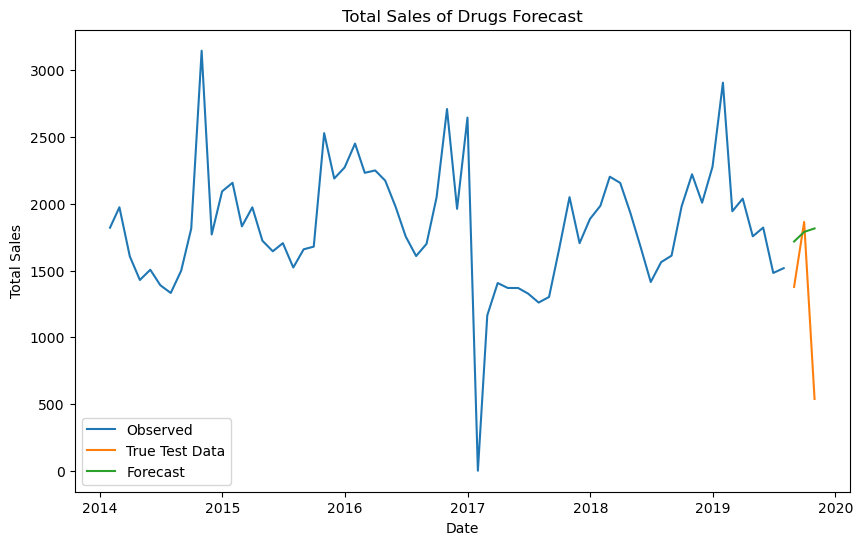

In [33]:
# Forecast the next 10 time steps
forecast = results.forecast(steps=3)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Observed')
plt.plot(test_data.index, test_data['total_sales'], label='True Test Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales of Drugs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [34]:
forecast

2019-08-31    1717.759368
2019-09-30    1789.833301
2019-10-31    1815.830170
Freq: ME, dtype: float64

In [35]:
residuals = test_data["total_sales"] - forecast

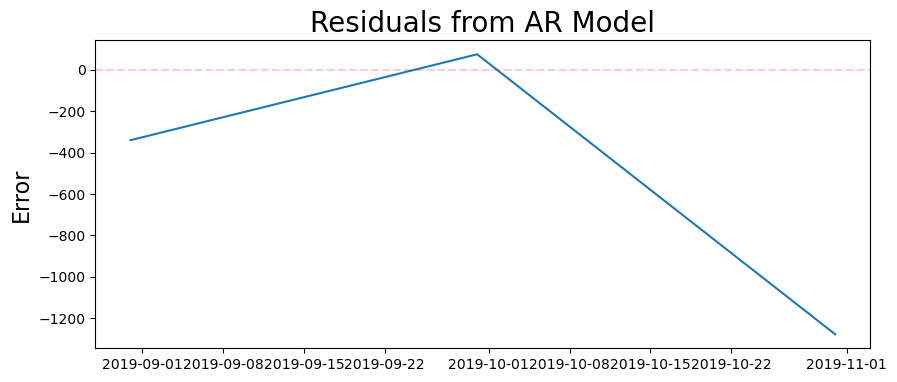

In [36]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [37]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 764.2996381110047


The AR(1) model works fine for predicting just 2 data points but root mean square error is high due to last data point.